# Exploratory Data Analysis (EDA)

## Structure of the Dataset:

**ASSETID**: A unique identifier for each property or asset in the dataset. It's a categorical variable with multiple levels.  
**PERIOD**: The time period in which the data was recorded, typically represented as a six-digit integer (YYYYMM) indicating the year and month.  
**PRICE**: The total price of the property in the local currency (€). This is a numerical value.  
**UNITPRICE**: The price per unit area (square meter) of the property. This is also a numerical value.  
**CONSTRUCTEDAREA**: The total constructed area of the property in square meters. It's an integer value indicating the size of the property.  
**ROOMNUMBER**: The number of rooms in the property. This integer value includes all types of rooms (e.g., bedrooms, living rooms).  
**BATHNUMBER**: The number of bathrooms in the property. This is an integer value.  
**HASTERRACE**: A binary indicator (0/1) where 1 indicates the property has a terrace and 0 indicates it does not.  
**HASLIFT**: A binary indicator (0/1) where 1 indicates the property has a lift (elevator) and 0 indicates it does not.  
**HASAIRCONDITIONING**: A binary indicator (0/1) where 1 indicates the property has air conditioning and 0 indicates it does not.  
**AMENITYID**: An integer that likely represents a category or type of amenities associated with the property.  
**HASPARKINGSPACE**: A binary indicator (0/1) where 1 indicates the property includes a parking space and 0 indicates it does not.  
**ISPARKINGSPACEINCLUDEDINPRICE**: A binary indicator (0/1) where 1 indicates the parking space is included in the property price, and 0 indicates it is not.  
**PARKINGSPACEPRICE**: An integer that appears to be a placeholder or a standardized value (likely 1 in this dataset).  
**HASNORTHORIENTATION**: A binary indicator (0/1) where 1 indicates the property has a northern orientation and 0 indicates it does not.  
**HASSOUTHORIENTATION**: A binary indicator (0/1) where 1 indicates the property has a southern orientation and 0 indicates it does not.  
**HASEASTORIENTATION**: A binary indicator (0/1) where 1 indicates the property has an eastern orientation and 0 indicates it does not.  
**HASWESTORIENTATION**: A binary indicator (0/1) where 1 indicates the property has a western orientation and 0 indicates it does not.  
**HASBOXROOM**: A binary indicator (0/1) where 1 indicates the property includes a box room and 0 indicates it does not.  
**HASWARDROBE**: A binary indicator (0/1) where 1 indicates the property includes a built-in wardrobe, and 0 indicates it does not.  
**HASSWIMMINGPOOL**: A binary indicator (0/1) where 1 indicates the property includes a swimming pool, and 0 indicates it does not.  
**HASDOORMAN**: A binary indicator (0/1) where 1 indicates the property has a doorman or concierge service, and 0 indicates it does not.  
**HASGARDEN**: A binary indicator (0/1) where 1 indicates the property has a garden, and 0 indicates it does not.  
**ISDUPLEX**: A binary indicator (0/1) where 1 indicates the property is a duplex, and 0 indicates it is not.  
**ISSTUDIO**: A binary indicator (0/1) where 1 indicates the property is a studio, and 0 indicates it is not.  
**ISINTOPFLOOR**: A binary indicator (0/1) where 1 indicates the property is located on the top floor, and 0 indicates it is not.  
**CONSTRUCTIONYEAR**: The year the property was constructed. This is an integer value.  
**FLOORCLEAN**: An integer likely representing the floor level of the property.  
**FLATLOCATIONID**: An integer that likely corresponds to a specific location or region code for the flat.  
**CADCONSTRUCTIONYEAR**: The construction year of the property according to cadastral records.  
**CADMAXBUILDINGFLOOR**: The maximum number of floors in the building according to cadastral records.  
**CADDWELLINGCOUNT**: The number of dwelling units in the building according to cadastral records.  
**CADASTRALQUALITYID**: An integer representing the cadastral quality or classification of the building.  
**BUILTTYPEID_1**: A binary indicator (0/1) where 1 indicates the property is new construction.  
**BUILTTYPEID_2**: A binary indicator (0/1) where 1 indicates the property is second hand to be restored.  
**BUILTTYPEID_3**: A binary indicator (0/1) where 1 indicates the property is second hand in good condition.  
**DISTANCE_TO_CITY_CENTER**: A numerical value representing the distance (km) from the property to the city center.  
**DISTANCE_TO_METRO**: A numerical value representing the distance (km) from the property to the nearest metro station.  
**DISTANCE_TO_{main avenue}**: A numerical value representing the distance (km) from the property to the main avenue of each city.  
**LONGITUDE**: The geographical longitude of the property’s location.  
**LATITUDE**: The geographical latitude of the property’s location.  


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

### Loading the Dataset

In [2]:
data = pd.read_csv("C:\\Users\\marin\\Documents\\TFM\\TFM_VS_2\\Rental-Price-Recommendation-System-in-Madrid-using-Machine-Learning\\data\\Madrid.csv")
data.sample(5)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
85867,A10958040894879489801,201812,111000.0,1608.695652,69,2,1,0,0,0,...,10,6.0,0,0,1,7.871855,0.856529,5.070497,-3.703951,40.345876
9179,A3006059373666573043,201803,172000.0,1577.981651,109,3,2,0,1,0,...,94,3.0,1,0,0,12.433071,2.428326,11.338605,-3.558361,40.402023
38904,A6899648520530169905,201812,407000.0,3539.130435,115,3,2,0,1,0,...,7,6.0,0,0,1,0.835868,0.137294,1.248027,-3.706554,40.423798
53608,A188081961403394362,201812,932000.0,5861.635220,159,5,2,0,1,1,...,14,4.0,0,0,1,2.707243,0.200214,1.435474,-3.673554,40.424436
86555,A14059256978379353625,201812,156000.0,1418.181818,110,3,2,1,0,0,...,9,5.0,0,0,1,7.493875,0.434142,4.620751,-3.697406,40.349447


### Assigning Districts to Properties Using Spatial Join

In [3]:
geometry = [Point(xy) for xy in zip(data['LONGITUDE'], data['LATITUDE'])]
gdf_points = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

gdf_districts = gpd.read_file(r'C:\Users\marin\Documents\TFM\TFM_VS_2\Rental-Price-Recommendation-System-in-Madrid-using-Machine-Learning\data\madrid-districts.geojson')
gdf_districts.set_crs('EPSG:4326', inplace=True)
print(gdf_districts.head())
print(gdf_districts.columns)

gdf_districts = gdf_districts.to_crs(gdf_points.crs)

gdf_merged = gpd.sjoin(gdf_points, gdf_districts, how='left', predicate='within')
data = data.reset_index(drop=True)
gdf_merged = gdf_merged.reset_index(drop=True)

data['DISTRICT'] = gdf_merged['name']
data.sample(10)

         name  cartodb_id                created_at                updated_at  \
0      Centro           1 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   
1  Arganzuela           2 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   
2      Retiro           3 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   
3   Salamanca           4 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   
4   Chamartin           5 2013-12-02 07:20:26+01:00 2013-12-02 07:20:26+01:00   

                                            geometry  
0  MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40...  
1  MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40...  
2  MULTIPOLYGON (((-3.66279 40.4097, -3.66384 40....  
3  MULTIPOLYGON (((-3.65809 40.43945, -3.65828 40...  
4  MULTIPOLYGON (((-3.67231 40.48388, -3.67237 40...  
Index(['name', 'cartodb_id', 'created_at', 'updated_at', 'geometry'], dtype='object')


,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,DISTRICT
83755,A15103141037798749200,201806,110000.0,2391.304348,46,1,1,0,1,1,...,4.0,0,0,1,5.567313,0.456480,4.370527,-3.742966,40.376452,Carabanchel
58464,A8537966865591514300,201809,117000.0,1857.142857,63,2,1,0,0,1,...,7.0,0,0,1,7.201328,0.484389,6.057029,-3.759810,40.367964,Carabanchel
35187,A10035337237409604144,201806,550000.0,5670.103093,97,2,2,0,1,1,...,2.0,0,0,1,1.174386,0.288084,0.182924,-3.693432,40.423598,Centro
11675,A2037981348877611987,201803,289000.0,3042.105263,95,4,1,0,0,0,...,6.0,0,1,0,4.156008,0.227750,1.501960,-3.673568,40.445995,Chamartin
22014,A4324911523824955182,201809,1089000.0,9228.813559,118,3,3,1,1,1,...,4.0,0,0,1,1.389590,0.326686,0.448119,-3.698871,40.404682,Arganzuela
31101,A2749370301364979190,201809,219000.0,2807.692308,78,3,1,0,1,0,...,5.0,0,0,1,5.106851,0.120125,3.239451,-3.650832,40.438485,Ciudad Lineal
42250,A16256764379399339372,201806,259000.0,3984.615385,65,2,1,0,1,1,...,5.0,0,0,1,4.398303,0.393670,1.474221,-3.673572,40.448715,Chamartin
71682,A13783554203724204333,201812,1153000.0,5823.232323,198,4,3,0,1,0,...,3.0,0,1,0,2.851979,0.313701,0.690014,-3.680605,40.435161,Salamanca
37144,A592732991748462682,201812,490000.0,4083.333333,120,4,2,0,0,0,...,6.0,0,1,0,0.996537,0.255706,1.493245,-3.710622,40.409304,Centro
35981,A12808082436849602344,201812,110000.0,4782.608696,23,0,1,0,0,0,...,3.0,0,0,1,0.936071,0.155486,0.542868,-3.699174,40.408951,Centro


#### Check that all districts of Madrid are present in the dataset

In [4]:
data["DISTRICT"].unique()

array(['Carabanchel', 'Centro', 'Arganzuela', 'Puente de Vallecas',
       'Ciudad Lineal', 'Salamanca', 'Moncloa-Aravaca', 'Latina', 'Usera',
       'Retiro', 'Hortaleza', 'Chamartin', 'Tetuan', 'Chamberi',
       'Villaverde', 'Villa de Vallecas', 'Fuencarral-El Pardo',
       'Barajas', 'Moratalaz', nan, 'Vicalvaro', 'San Blas'], dtype=object)

### Checking Shape of the Dataset

In [5]:
data.shape

(94815, 42)

### Checking all columns in the Dataset

In [6]:
data.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT'],
      dtype='object')

### Information about the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        94815 non-null  object 
 1   PERIOD                         94815 non-null  int64  
 2   PRICE                          94815 non-null  float64
 3   UNITPRICE                      94815 non-null  float64
 4   CONSTRUCTEDAREA                94815 non-null  int64  
 5   ROOMNUMBER                     94815 non-null  int64  
 6   BATHNUMBER                     94815 non-null  int64  
 7   HASTERRACE                     94815 non-null  int64  
 8   HASLIFT                        94815 non-null  int64  
 9   HASAIRCONDITIONING             94815 non-null  int64  
 10  AMENITYID                      94815 non-null  int64  
 11  HASPARKINGSPACE                94815 non-null  int64  
 12  ISPARKINGSPACEINCLUDEDINPRICE  94815 non-null 

In [8]:
data.describe()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,94815.000000,9.481500e+04,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,...,94815.000000,94814.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000
mean,201808.613289,3.961101e+05,3661.051534,101.397163,2.580900,1.585456,0.355260,0.695597,0.448600,2.922660,...,39.187164,4.852184,0.030396,0.186563,0.783041,4.486269,0.480916,2.679227,-3.686408,40.421083
std,3.684625,4.170744e+05,1700.499398,67.078259,1.244878,0.843024,0.478595,0.460157,0.497354,0.314865,...,54.254387,1.462988,0.171675,0.389563,0.412177,2.994906,1.433584,2.581346,0.039239,0.035495
min,201803.000000,2.100000e+04,805.309735,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.007647,0.001416,0.001435,-3.833611,36.756391
25%,201806.000000,1.600000e+05,2240.000000,62.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,...,12.000000,4.000000,0.000000,0.000000,1.000000,2.407711,0.213458,1.035143,-3.708474,40.396868
50%,201809.000000,2.620000e+05,3480.000000,83.000000,3.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,21.000000,5.000000,0.000000,0.000000,1.000000,4.123505,0.331882,1.956978,-3.694104,40.423295
75%,201812.000000,4.670000e+05,4744.623034,117.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,...,40.000000,6.000000,0.000000,0.000000,1.000000,6.213463,0.523025,3.840641,-3.666227,40.441998
max,201812.000000,8.133000e+06,9997.560976,985.000000,93.000000,20.000000,1.000000,1.000000,1.000000,3.000000,...,1499.000000,9.000000,1.000000,1.000000,1.000000,415.752584,399.477366,412.803688,-2.753303,40.520637


### Checking if there is any Null value present in the Dataset

In [9]:
data.isnull().sum().sort_values(ascending=False)

CONSTRUCTIONYEAR                 55873
FLATLOCATIONID                    6387
FLOORCLEAN                        3846
DISTRICT                           101
CADASTRALQUALITYID                   1
DISTANCE_TO_METRO                    0
DISTANCE_TO_CITY_CENTER              0
BUILTTYPEID_3                        0
BUILTTYPEID_2                        0
BUILTTYPEID_1                        0
PERIOD                               0
CADDWELLINGCOUNT                     0
CADMAXBUILDINGFLOOR                  0
CADCONSTRUCTIONYEAR                  0
DISTANCE_TO_CASTELLANA               0
LONGITUDE                            0
LATITUDE                             0
ISINTOPFLOOR                         0
ISSTUDIO                             0
ISDUPLEX                             0
HASGARDEN                            0
ASSETID                              0
HASSWIMMINGPOOL                      0
HASWARDROBE                          0
PRICE                                0
UNITPRICE                

### Removing irrelevant or redundant columns from the DataFrame

In [10]:
columns_to_drop = [
    "CONSTRUCTIONYEAR", "FLOORCLEAN", "FLATLOCATIONID",
    "AMENITYID", "PARKINGSPACEPRICE"
]

data = data.drop(columns=columns_to_drop)

The following columns are removed for these reasons:

- **CONSTRUCTIONYEAR**: Contains approximately 55,000 missing values. Additionally, the **CADCONSTRUCTIONYEAR** column already provides the construction year information.
- **FLOORCLEAN**: Contains around 3,000 values, but its meaning is unclear and lacks proper documentation, making it unreliable for analysis.
- **FLATLOCATIONID**: Serves only as an identifier and does not provide meaningful or interpretable information.
- **AMENITYID** and **PARKINGSPACEPRICE**: Represent IDs or placeholder values (e.g., **PARKINGSPACEPRICE** appears consistently as 1 in this dataset) and lack supporting details, reducing their usefulness for modeling or analysis.
- cadastralqualityid


In [11]:
data.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT'],
      dtype='object')

In [12]:
data.isnull().sum().sort_values(ascending=False)

DISTRICT                         101
CADASTRALQUALITYID                 1
HASDOORMAN                         0
ISDUPLEX                           0
ISSTUDIO                           0
ISINTOPFLOOR                       0
CADCONSTRUCTIONYEAR                0
CADMAXBUILDINGFLOOR                0
CADDWELLINGCOUNT                   0
BUILTTYPEID_1                      0
BUILTTYPEID_2                      0
BUILTTYPEID_3                      0
DISTANCE_TO_CITY_CENTER            0
DISTANCE_TO_METRO                  0
DISTANCE_TO_CASTELLANA             0
LONGITUDE                          0
LATITUDE                           0
HASGARDEN                          0
ASSETID                            0
PERIOD                             0
HASWARDROBE                        0
PRICE                              0
UNITPRICE                          0
CONSTRUCTEDAREA                    0
ROOMNUMBER                         0
BATHNUMBER                         0
HASTERRACE                         0
H

In [13]:
data.shape

(94815, 37)

In [14]:
data = data.dropna()

In [15]:
data.shape

(94713, 37)

Since the dataset is sufficiently large, the amount of missing values represents a minimal proportion of the total records. Therefore, it was decided to remove these rows with missing data in order to simplify the analysis, as this does not compromise the representativeness of the sample or the quality of the subsequent model.

### Checking if there is any Duplicate value present in the Dataset

In [16]:
data.duplicated().sum()

0

In [17]:
data['ASSETID'].duplicated().sum()

18988

In [18]:
data[data['ASSETID'].duplicated()]['ASSETID'].value_counts()

ASSETID
A5463639993615125363     10
A14882068007191593522     8
A2282202115281541721      8
A1315840462730187222      7
A15465061650135445249     6
                         ..
A16715363599029024918     1
A7125061538099176310      1
A4709182542099690243      1
A2165879195720530985      1
A8974485819301533463      1
Name: count, Length: 13811, dtype: int64

In [19]:
data = data.drop_duplicates(subset='ASSETID', keep='first')


In [20]:
data.shape

(75725, 37)

Keep only the first record for each property (ASSETID) to remove duplicates.

### Descriptive Analysis and Data Visualization

#### Correlation Analysis

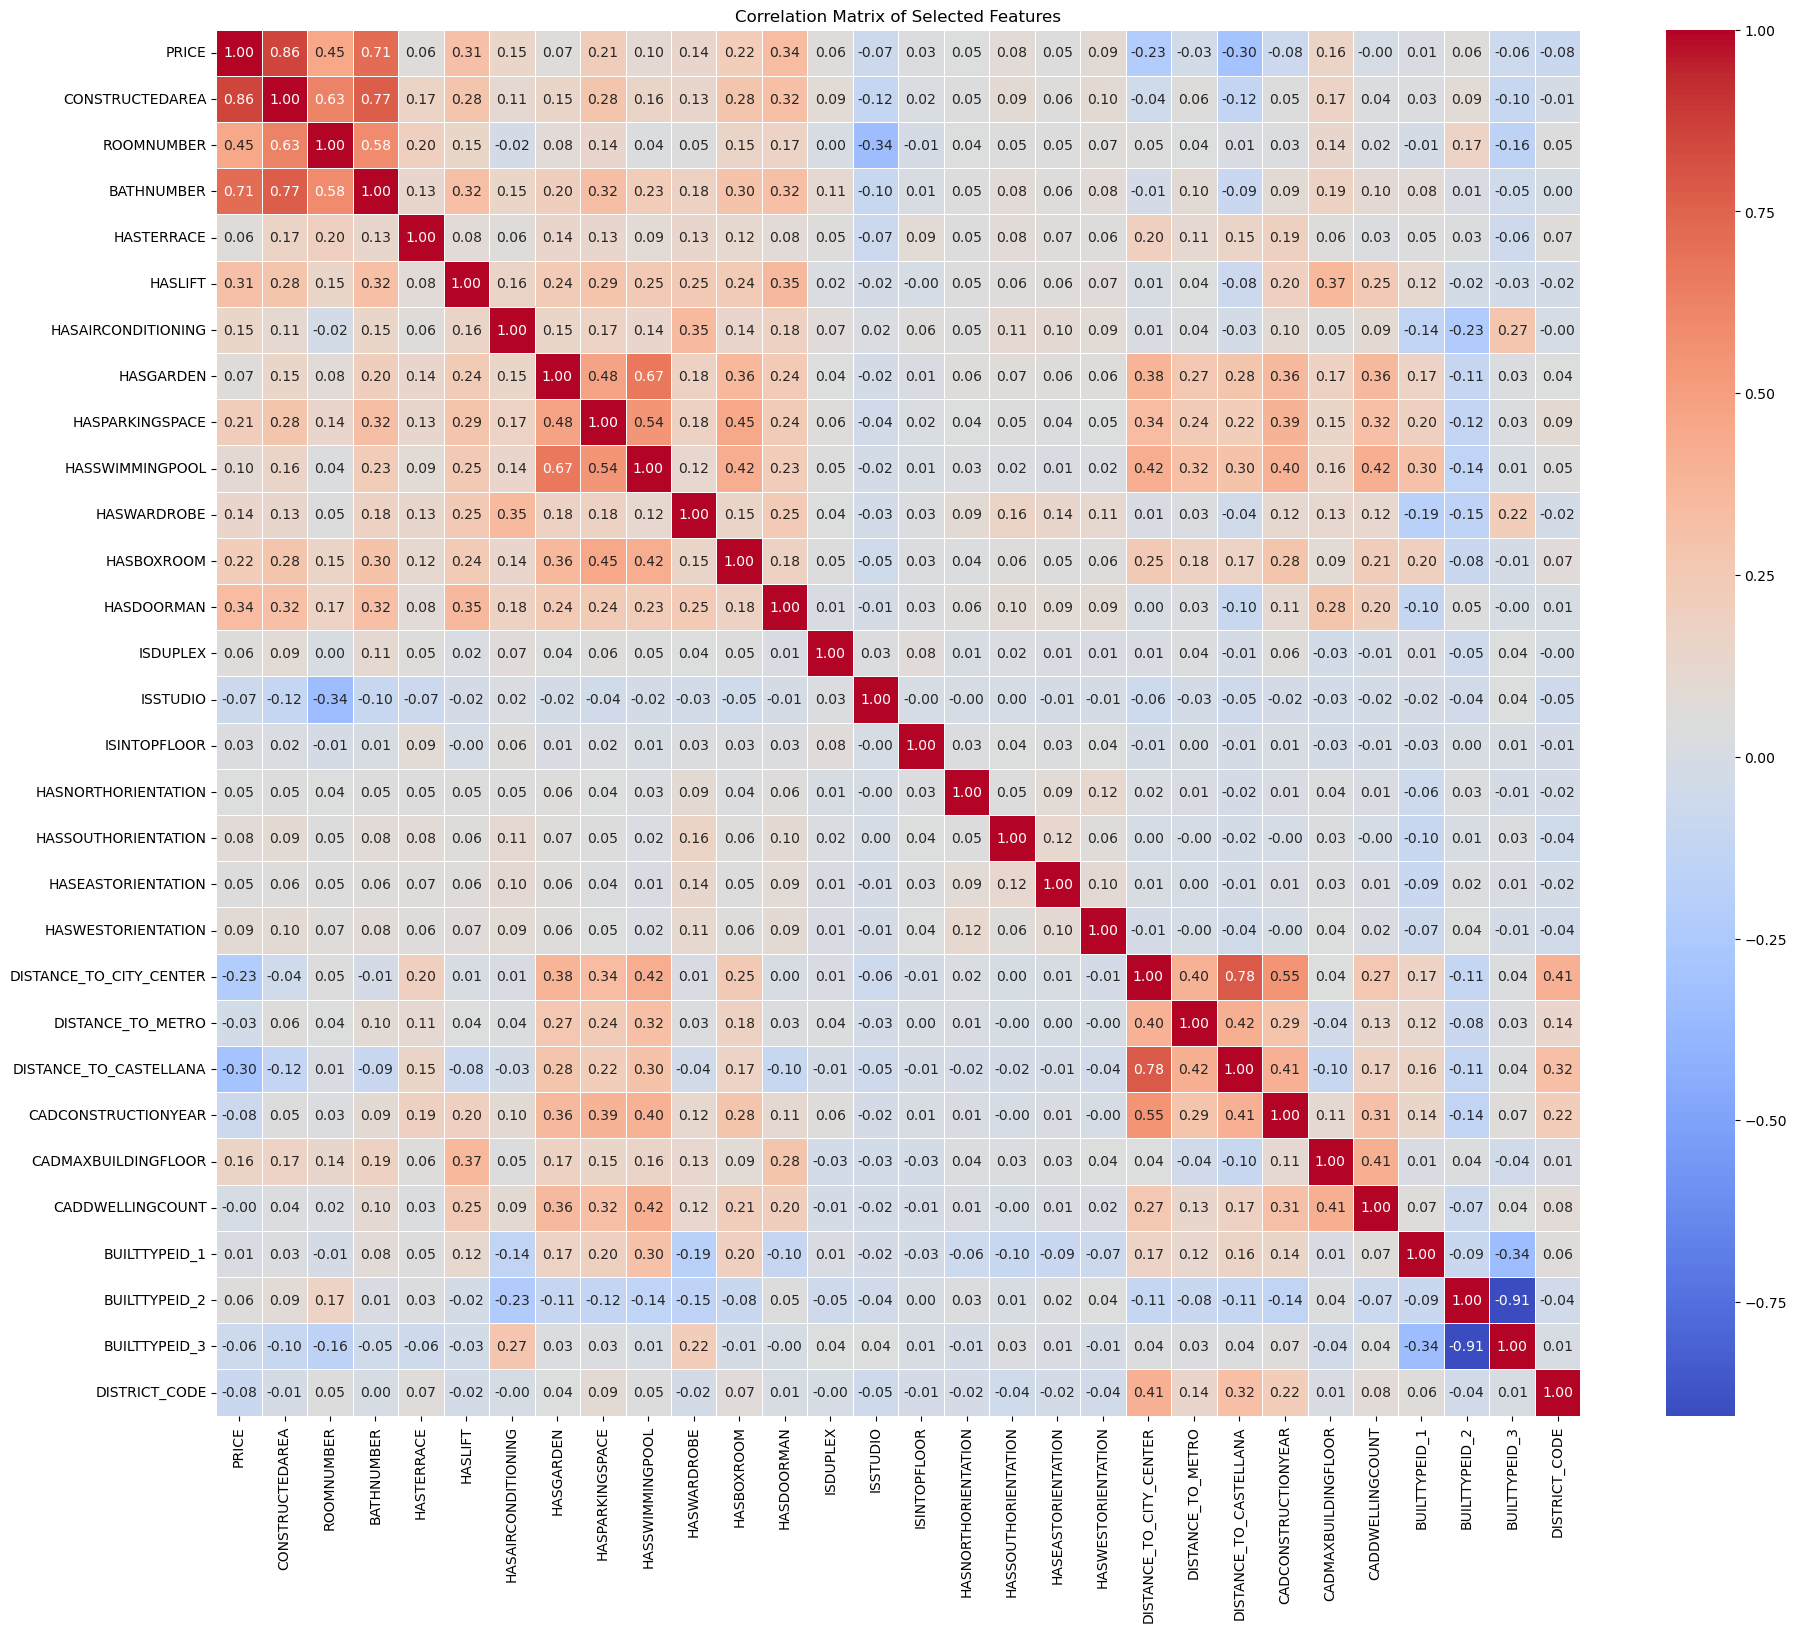

In [21]:
data['DISTRICT_CODE'] = data['DISTRICT'].astype('category').cat.codes

numeric_columns = [
    'PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASPARKINGSPACE', 'HASSWIMMINGPOOL', 'HASWARDROBE', 'HASBOXROOM',
    'HASDOORMAN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
    'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 'HASWESTORIENTATION',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR',
    'CADDWELLINGCOUNT', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
    'DISTRICT_CODE' 
]

correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()

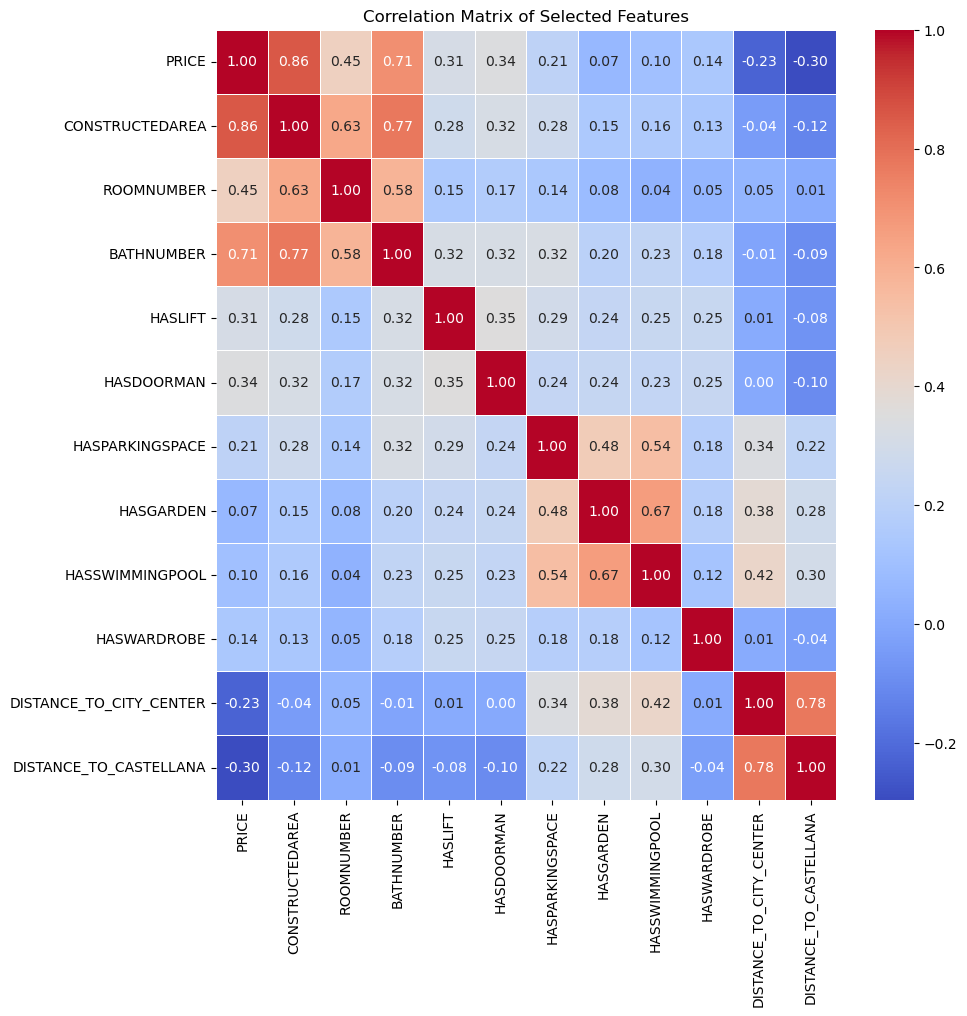

In [22]:
data['DISTRICT_CODE'] = data['DISTRICT'].astype('category').cat.codes

minimal_features = [
    'PRICE',
    'CONSTRUCTEDAREA',
    'ROOMNUMBER',
    'BATHNUMBER',
    'HASLIFT',
    'HASDOORMAN',
    'HASPARKINGSPACE',
    'HASGARDEN',
    'HASSWIMMINGPOOL',
    'HASWARDROBE',
    'DISTANCE_TO_CITY_CENTER',
    'DISTANCE_TO_CASTELLANA'
]

correlation_matrix2 = data[minimal_features].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()

##### Correlation Analysis and Conclusions

##### 1. Variables with **Strong Influence on Price**

- **Constructed Area (`CONSTRUCTEDAREA`):**  
  This is the most impactful variable on price. Larger properties tend to have significantly higher prices, indicating that size is a key factor in valuation.

- **Number of Bathrooms (`BATHNUMBER`):**  
  More bathrooms are strongly associated with higher prices, reflecting increased comfort and functionality.

- **Number of Rooms (`ROOMNUMBER`):**  
  Also positively influences price, though to a lesser extent than area and bathrooms. More rooms generally mean more expensive properties.

- **Distances to Key Locations (`DISTANCE_TO_CITY_CENTER`, `DISTANCE_TO_CASTELLANA`):**  
  Greater distance from the city center or premium areas corresponds to lower prices, highlighting the importance of location and accessibility.

##### 2. Variables with **Moderate Influence**

- **Services and Amenities:**  
  - **Elevator (`HASLIFT`)** and **Doorman (`HASDOORMAN`):** Presence of these amenities increases price due to improved comfort and security.  
  - **Parking Space (`HASPARKINGSPACE`), Garden (`HASGARDEN`), and Swimming Pool (`HASSWIMMINGPOOL`):** Often found together and add extra value, commonly associated with higher-end properties.  
  - **Storage Room (`HASBOXROOM`) and Built-in Wardrobes (`HASWARDROBE`):** Also contribute positively, though to a lesser degree.

- **Building Characteristics:**  
  - Maximum building floors (`CADMAXBUILDINGFLOOR`) and building type relate to amenities and may reflect property style or quality.

##### 3. Variables with **Low or Negligible Influence**

- **Specific Property Features:**  
  - Orientation (north, south, east, west) and some building types show low correlations, suggesting minimal or context-dependent effects on price.  
  - Features like air conditioning (`HASAIRCONDITIONING`), studio apartments (`ISSTUDIO`), duplex (`ISDUPLEX`), or top-floor units (`ISINTOPFLOOR`) have little direct influence overall. These may affect niche markets but not general pricing.

##### 4. Internal Relationships Among Variables

- **Grouped Amenities:**  
  Garden, pool, and parking tend to co-occur in higher-end homes, indicating a combined pattern of luxury features.

- **Mutually Exclusive Building Types:**  
  Some building type categories are negatively correlated, reflecting distinct, non-overlapping property classifications.

- **Size and Amenities:**  
  Larger homes usually have more amenities (elevator, parking, doorman), confirming these features commonly appear together and signify higher property status.

##### **General Conclusion**

The analysis confirms that property size, number of bathrooms, and location are the key determinants of price. Amenities and services positively influence value, though less strongly, while more specific features and building types play a secondary or niche role. Proximity to central and premium areas is crucial for maintaining higher prices.


#### House Price Distribution

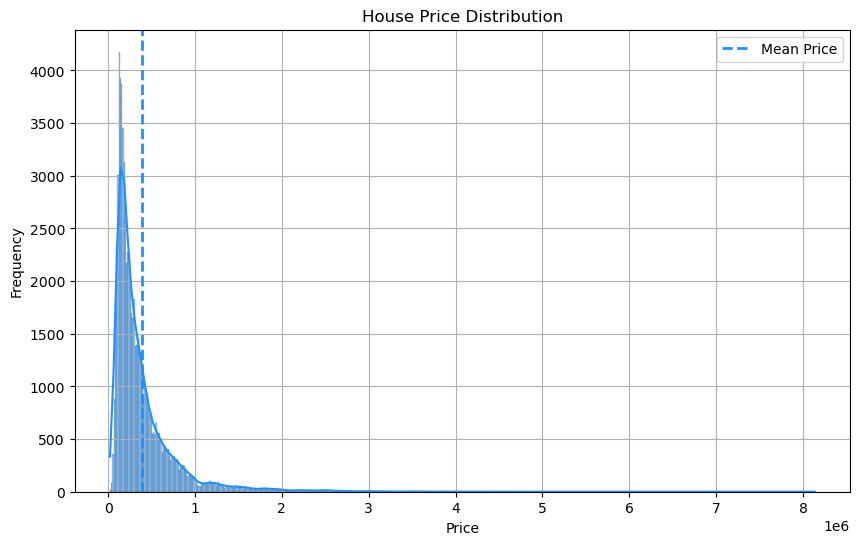

In [23]:
plt.figure(figsize=(10,6))

sns.histplot(data['PRICE'], kde=True, color='dodgerblue')

plt.axvline(x=data['PRICE'].mean(), color='dodgerblue', linestyle='--', linewidth=2, label='Mean Price')

plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

The distribution of property prices is highly right-skewed, with a mean price (€389,294) significantly higher than the median (€257,000), indicating the presence of several very high-priced luxury properties that pull the average upward. The large standard deviation (€413,125) and extreme maximum value (€8,133,000) highlight considerable variability and the existence of outliers. Most properties are concentrated below €500,000, as shown by the 25th and 75th percentiles (€157,000 and €456,000 respectively).

#### Checking Mean, Median, Maximum & Minimum House Rents

In [24]:
print("Mean House Rent:", round(data["PRICE"].mean()))

print("Median House Rent:", round(data["PRICE"].median()))

print("Highest House Rent:", round(data["PRICE"].max()))

print("Lowest House Rent:", round(data["PRICE"].min()))

Mean House Rent: 389294
Median House Rent: 257000
Highest House Rent: 8133000
Lowest House Rent: 21000


#### 10 Highest House Rents present in the Dataset

In [25]:
data["PRICE"].sort_values(ascending = False)[:10]

56066    8133000.0
71763    7138000.0
67175    7124000.0
67313    7044000.0
67443    7018000.0
47227    6996000.0
25848    6970000.0
25845    6829000.0
53495    6702000.0
2586     6642000.0
Name: PRICE, dtype: float64

#### 10 Lowest House Rents present in the Dataset

In [26]:
data["PRICE"].sort_values()[:10]

53986    21000.0
85843    24000.0
29778    24000.0
63690    24000.0
78538    25000.0
29919    26000.0
78503    28000.0
84222    29000.0
86243    29000.0
77439    30000.0
Name: PRICE, dtype: float64

#### Constructed Area Distribution

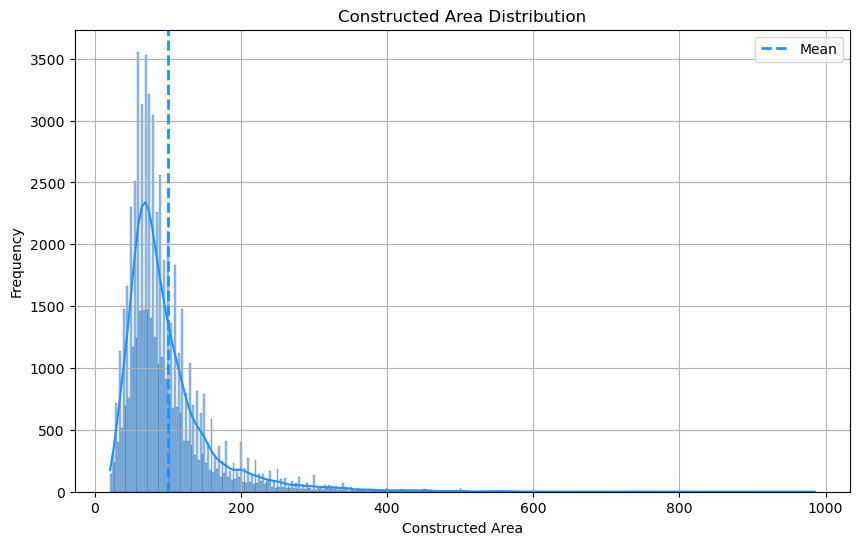

In [27]:
plt.figure(figsize=(10,6))

sns.histplot(data['CONSTRUCTEDAREA'], kde=True, color='dodgerblue')

plt.axvline(x=data['CONSTRUCTEDAREA'].mean(), color='dodgerblue', linestyle='--', linewidth=2, label='Mean')

plt.title('Constructed Area Distribution')
plt.xlabel('Constructed Area')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()


The distribution of constructed area is highly right-skewed, with a mean of 100.21 m² notably higher than the median of 82 m², indicating a small number of very large properties pulling the average upward. The wide spread, reflected in a standard deviation of 66.47 m² and an extreme maximum of 985 m², shows considerable variability in property sizes. 

#### Checking Mean, Median, Maximum & Minimum Constructed Area

In [28]:
print("Mean Constructed Area:", round(data["CONSTRUCTEDAREA"].mean()))

print("Median Constructed Area:", round(data["CONSTRUCTEDAREA"].median()))

print("Highest Constructed Area:", round(data["CONSTRUCTEDAREA"].max()))

print("Lowest Constructed Area:", round(data["CONSTRUCTEDAREA"].min()))

Mean Constructed Area: 100
Median Constructed Area: 82
Highest Constructed Area: 985
Lowest Constructed Area: 21


#### Distribution of Different Number of Rooms Available

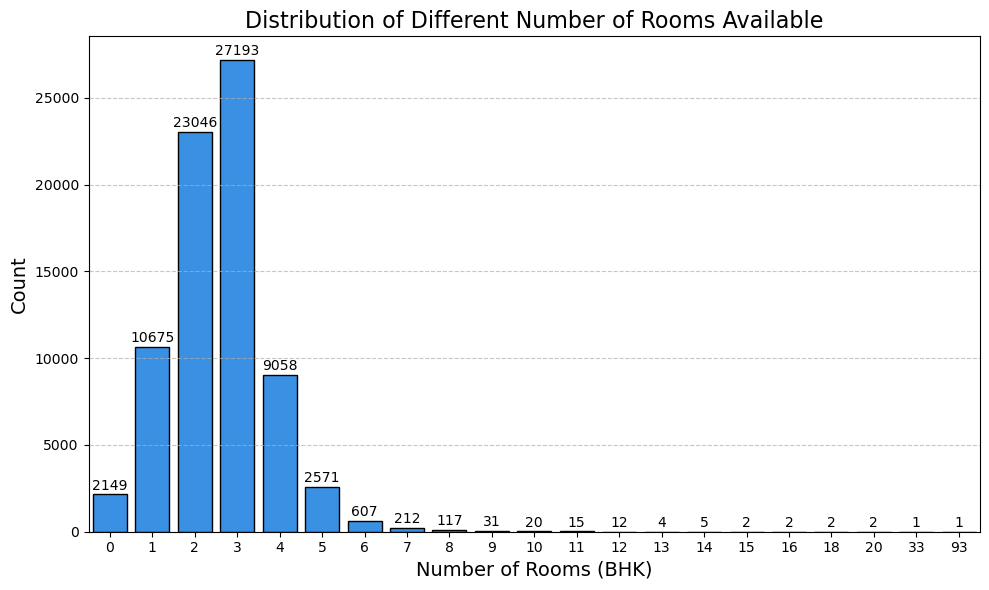

In [29]:

room_counts = data['ROOMNUMBER'].value_counts().sort_index()

plt.figure(figsize=(10,6))

sns.barplot(x=room_counts.index, y=room_counts.values, color='dodgerblue', edgecolor='black')

for i, v in enumerate(room_counts.values):
    plt.text(i, v + max(room_counts.values)*0.01, str(v), ha='center', fontsize=10)

plt.title('Distribution of Different Number of Rooms Available', fontsize=16)
plt.xlabel('Number of Rooms (BHK)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The distribution of the number of rooms shows that most properties have between 1 and 4 rooms, with 3-room properties being the most common, representing about 36% of the dataset. Properties with 0 rooms likely correspond to studios or non-residential units. Higher room counts above 5 become increasingly rare, and extreme values such as 33 or 93 rooms appear to be outliers or special cases. This distribution reflects a typical housing market focused on standard family homes. 

#### Checking Mean, Median, Maximum & Minimum Room Number

In [30]:
print("Mean Room Number:", round(data["ROOMNUMBER"].mean()))

print("Median Room Number:", round(data["ROOMNUMBER"].median()))

print("Highest Room Number:", round(data["ROOMNUMBER"].max()))

print("Lowest Room Number:", round(data["ROOMNUMBER"].min()))

Mean Room Number: 3
Median Room Number: 3
Highest Room Number: 93
Lowest Room Number: 0


#### Distribution of Different Number of Bathrooms Available

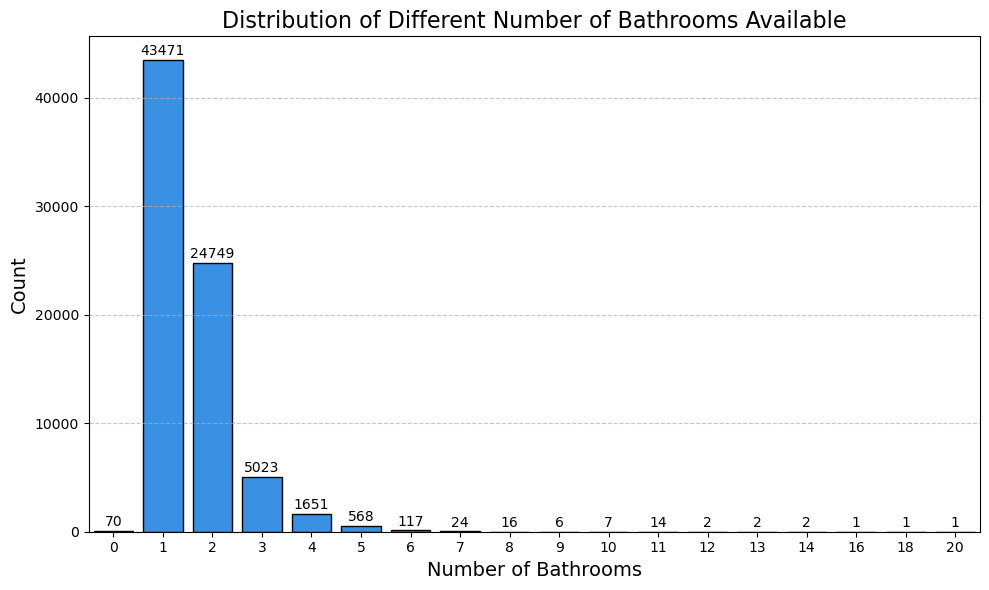

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

bath_counts = data['BATHNUMBER'].value_counts().sort_index()

plt.figure(figsize=(10,6))

sns.barplot(x=bath_counts.index, y=bath_counts.values, color='dodgerblue', edgecolor='black')

# Añadimos etiquetas encima de cada barra
for i, v in enumerate(bath_counts.values):
    plt.text(i, v + max(bath_counts.values)*0.01, str(v), ha='center', fontsize=10)

plt.title('Distribution of Different Number of Bathrooms Available', fontsize=16)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The distribution of the number of bathrooms is highly concentrated on properties with 1 or 2 bathrooms, with 1 bathroom being the most common, representing about 57% of the dataset. Properties with zero bathrooms are rare and likely special cases. The frequency of properties decreases significantly as the number of bathrooms increases beyond 2, with very few properties having more than 5 bathrooms. A few extreme values suggest possible outliers.

#### Checking Mean, Median, Maximum & Minimum Bath Number

In [32]:
print("Mean Bath Number:", round(data["BATHNUMBER"].mean()))

print("Median Bath Number:", round(data["BATHNUMBER"].median()))

print("Highest Bath Number:", round(data["BATHNUMBER"].max()))

print("Lowest Bath Number:", round(data["BATHNUMBER"].min()))

Mean Bath Number: 2
Median Bath Number: 1
Highest Bath Number: 20
Lowest Bath Number: 0


#### Proportion of Properties with Key Features

In [33]:
boolean_features = [
    "HASTERRACE", "HASLIFT", "HASAIRCONDITIONING",
    "HASPARKINGSPACE", "HASBOXROOM", "HASWARDROBE",
    "HASSWIMMINGPOOL", "HASDOORMAN", "HASGARDEN"
]

for feature in boolean_features:
    proportion = data[feature].mean() * 100
    print(f"{feature}: {proportion:.2f}% ")

HASTERRACE: 35.00% 
HASLIFT: 68.91% 
HASAIRCONDITIONING: 43.86% 
HASPARKINGSPACE: 21.69% 
HASBOXROOM: 24.95% 
HASWARDROBE: 56.36% 
HASSWIMMINGPOOL: 14.14% 
HASDOORMAN: 24.80% 
HASGARDEN: 17.62% 


#### Number of Properties with each Anemnity

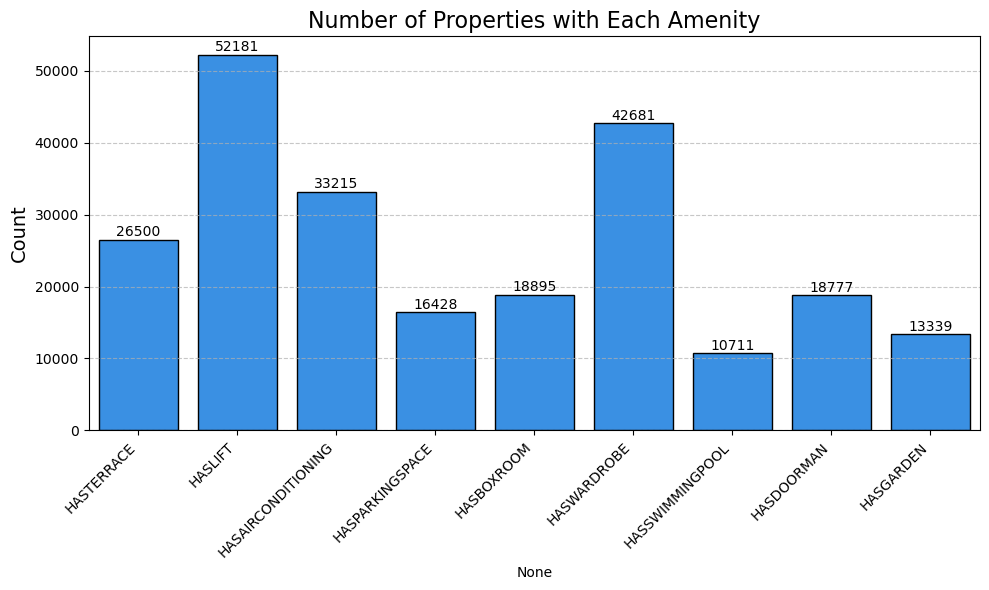

In [34]:
amenities = ['HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASPARKINGSPACE', 
             'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN']

amenity_counts = data[amenities].sum()

plt.figure(figsize=(10,6))

sns.barplot(x=amenity_counts.index, y=amenity_counts.values, color='dodgerblue', edgecolor='black')

for i, v in enumerate(amenity_counts.values):
    plt.text(i, v + max(amenity_counts.values)*0.01, str(v), ha='center', fontsize=10)

plt.title('Number of Properties with Each Amenity', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The most common amenities in the dataset are lifts and wardrobes, found in over half of the properties, indicating these are standard features. Air conditioning and parking spaces are moderately common, while terraces, doorman services, box rooms, gardens, and swimming pools are less frequent and likely reflect more premium or specialized housing. This distribution suggests a typical urban housing market where essential conveniences are widespread, and luxury amenities are limited.

#### Distribution of Built Types: 
1. New construction.
2. Second hand to be restored.
3. Second hand in good condition.

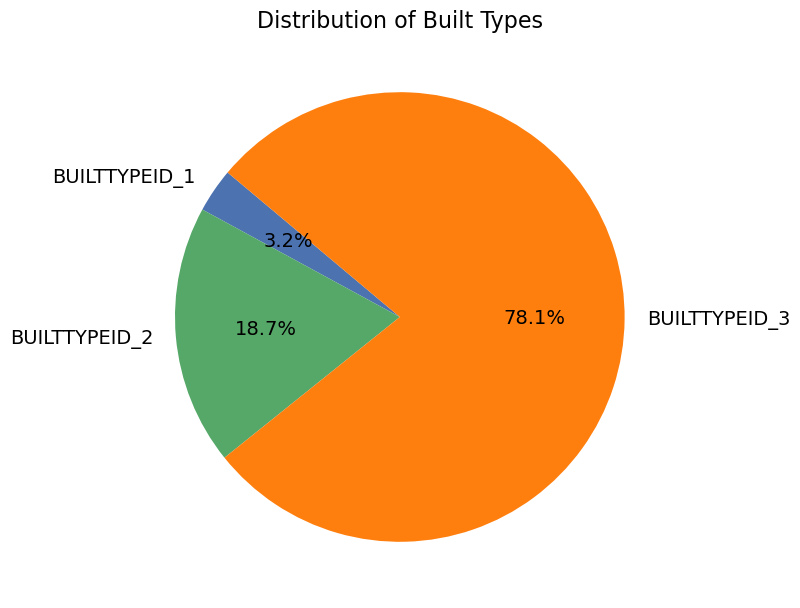

In [35]:
type_counts = data[['BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3']].sum()

colors = ['#4c72b0', '#55a868', '#ff7f0e']

plt.figure(figsize=(8,8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=colors,
        startangle=140, textprops={'fontsize': 14})

plt.title('Distribution of Built Types', fontsize=16)
plt.tight_layout()
plt.show()

The distribution of built types reveals a clear dominance of second-hand properties in good condition (Built Type 3), which make up 78.12% of the total housing stock. This suggests that the majority of properties available in the market are previously owned homes that are still in livable or desirable condition. Second-hand properties in need of restoration (Built Type 2) account for 18.70%, indicating a smaller portion of homes requiring refurbishment. Newly constructed properties (Built Type 1) represent only 3.18%, reflecting a limited presence of new developments in the dataset

#### Price vs. Square Meters Scatter Plot

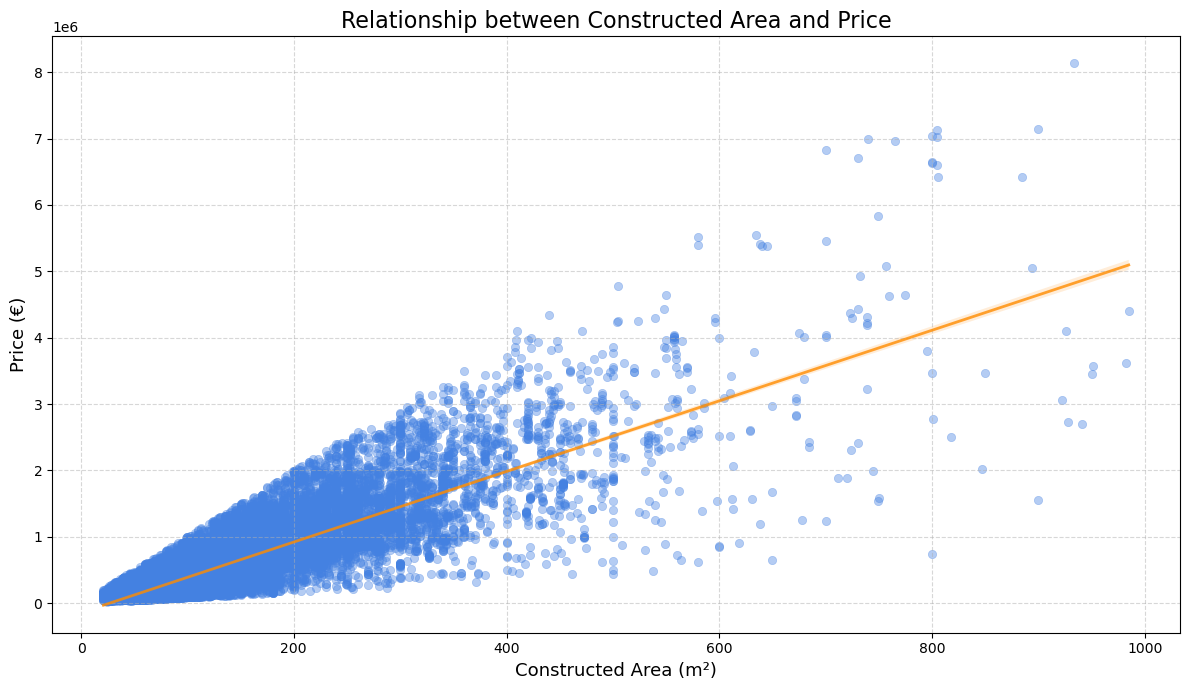

In [36]:
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=data,
    x='CONSTRUCTEDAREA',
    y='PRICE',
    alpha=0.4,
    color="#4481e1",
    edgecolor=None
)

sns.regplot(
    data=data,
    x='CONSTRUCTEDAREA',
    y='PRICE',
    scatter=False,
    color='darkorange',
    line_kws={'linewidth': 2, 'alpha': 0.8}
)

plt.title('Relationship between Constructed Area and Price', fontsize=16)
plt.xlabel('Constructed Area (m²)', fontsize=13)
plt.ylabel('Price (€)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The scatter plot and statistical analysis show a strong positive correlation (0.856) between the constructed area and property price, indicating that larger properties tend to be significantly more expensive. However, both variables exhibit right-skewed distributions, suggesting the presence of outliers and a concentration of values on the lower end. Most properties have a constructed area between 62 m² and 115 m², while prices are typically between €157,000 and €456,000. Despite this, a small number of high-end listings reach up to 985 m² and over €8 million, contributing to the visible spread in the upper range of the scatter plot.

#### Geospatial Visualization of Madrid Districts

In [37]:
gdf_districts = gpd.read_file(r'C:\Users\marin\Documents\TFM\TFM_VS_2\Rental-Price-Recommendation-System-in-Madrid-using-Machine-Learning\data\madrid-districts.geojson')

gdf_districts.set_crs('EPSG:4326', inplace=True)

madrid_center = [40.4168, -3.7038]
m = folium.Map(location=madrid_center, zoom_start=12, tiles="CartoDB positron")

fill_color = "darkblue"

for _, district in gdf_districts.iterrows():
    district_name = district['name']
    district_geometry = district['geometry']

    folium.GeoJson(
        district_geometry,
        name=district_name,
        style_function=lambda x, color=fill_color: {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.2
        },
        tooltip=district_name.upper()  
    ).add_to(m)
m

#### Top 100 Most Expensive and Cheapest Rentals in Madrid by District

In [38]:
gdf_districts = gpd.read_file(r'C:\Users\marin\Documents\TFM\TFM_VS_2\Rental-Price-Recommendation-System-in-Madrid-using-Machine-Learning\data\madrid-districts.geojson')
gdf_districts.set_crs('EPSG:4326', inplace=True)
top_expensive = data.sort_values(by='PRICE', ascending=False).head(100)

# Ordenar por precio ascendente y tomar las 100 más baratas
top_cheap = data.sort_values(by='PRICE', ascending=True).head(100)

madrid_center = [40.4168, -3.7038]
m = folium.Map(location=madrid_center, zoom_start=12, tiles="CartoDB positron")

fill_color = "darkblue"

for _, district in gdf_districts.iterrows():
    district_name = district['name']
    district_geometry = district['geometry']

    folium.GeoJson(
        district_geometry,
        name=district_name,
        style_function=lambda x, color=fill_color: {
            'fillColor': color,
            'color': color,
            'weight': 2,
            'fillOpacity': 0.2
        },
        tooltip=district_name.upper()  
    ).add_to(m)

# Mostrar propiedades más caras (azul)
for _, row in top_expensive.iterrows():
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        icon=folium.Icon(color="blue", icon=""),  
        popup=f"Price: {row['PRICE']}"
    ).add_to(m)

# Propiedades más baratas (verde)
for _, row in top_cheap.iterrows():
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        icon=folium.Icon(color="green", icon=""), 
        popup=f"Price: {row['PRICE']}"
    ).add_to(m)
from branca.element import Template, MacroElement

legend_html = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; 
    width: 200px; 
    background-color: white; 
    border: 2px solid grey; 
    z-index: 9999; 
    font-size: 14px;
    padding: 10px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    word-wrap: break-word;
    overflow-wrap: break-word;
">
    <strong>Legend</strong><br>
    <i class="fa fa-map-marker fa-lg" style="color:blue"></i> Top 100 most expensive<br>
    <i class="fa fa-map-marker fa-lg" style="color:green"></i> Top 100 cheapest
</div>
{% endmacro %}
"""

legend = MacroElement()
legend._template = Template(legend_html)
m.get_root().add_child(legend)
m

#### Summary Statistics of House Prices by District

In [39]:
stats_distritos = data.groupby("DISTRICT")["PRICE"].agg(['count', 'mean', 'min', 'max']).sort_values("mean", ascending=False)
print(stats_distritos)

                     count           mean      min        max
DISTRICT                                                     
Salamanca             6526  711931.964450  58000.0  6996000.0
Chamberi              4696  694110.306644  60000.0  7124000.0
Chamartin             3785  641058.388375  69000.0  8133000.0
Retiro                3257  597155.357691  68000.0  6630000.0
Moncloa-Aravaca       3014  554055.076311  54000.0  3700000.0
Centro                9304  479046.216681  33000.0  5054000.0
Hortaleza             2690  395729.739777  46000.0  3044000.0
Fuencarral-El Pardo   2704  384752.588757  39000.0  3977000.0
Tetuan                4517  357982.731902  24000.0  4098000.0
Barajas                837  357004.778973  72000.0  1804000.0
Arganzuela            3992  328386.773547  41000.0  3452000.0
Ciudad Lineal         4476  285618.409294  36000.0  2781000.0
San Blas              2767  221915.070473  39000.0  1282000.0
Moratalaz              974  210824.435318  52000.0   912000.0
Villa de

#### Number of houses in each district available for rent

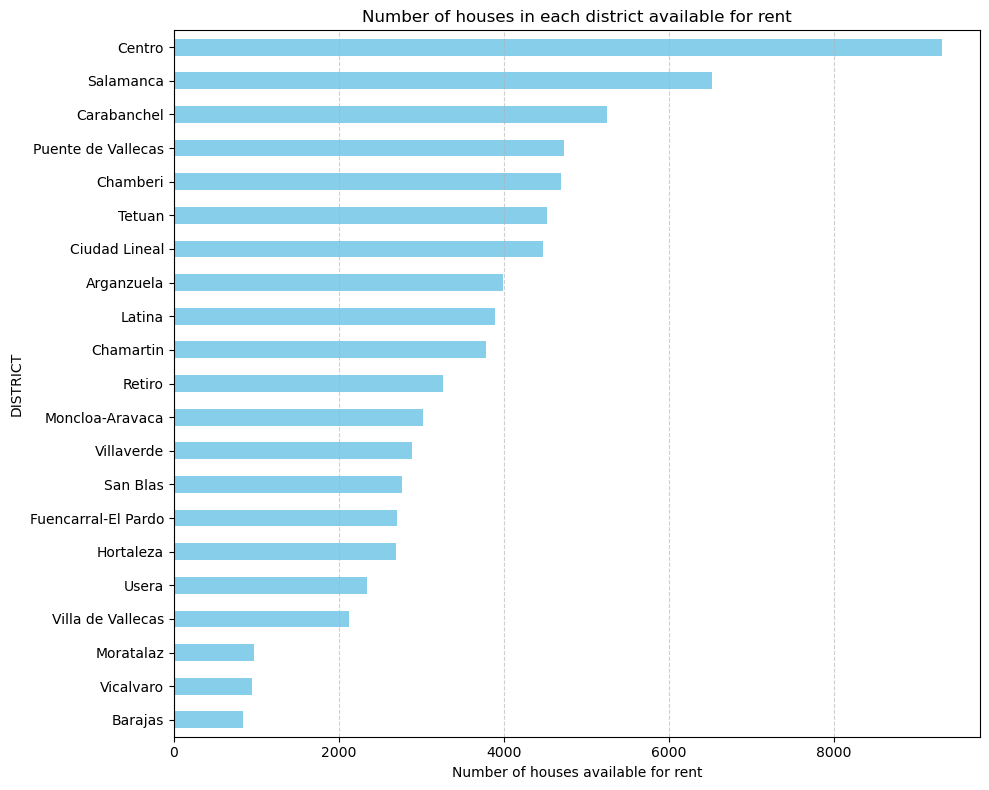

In [40]:
counts_distritos = data['DISTRICT'].value_counts().sort_values()

ax = counts_distritos.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.xlabel("Number of houses available for rent")
plt.title("Number of houses in each district available for rent")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The rental market is concentrated in central districts such as Centro, Salamanca, and Carabanchel, which have the highest number of available properties. While some districts like Barajas have fewer listings, they exhibit higher average prices, suggesting more premium housing. In contrast, districts like Villa de Vallecas and Vicalvaro have moderate property counts but lower average prices, indicating more affordable areas.

#### Average Price by District

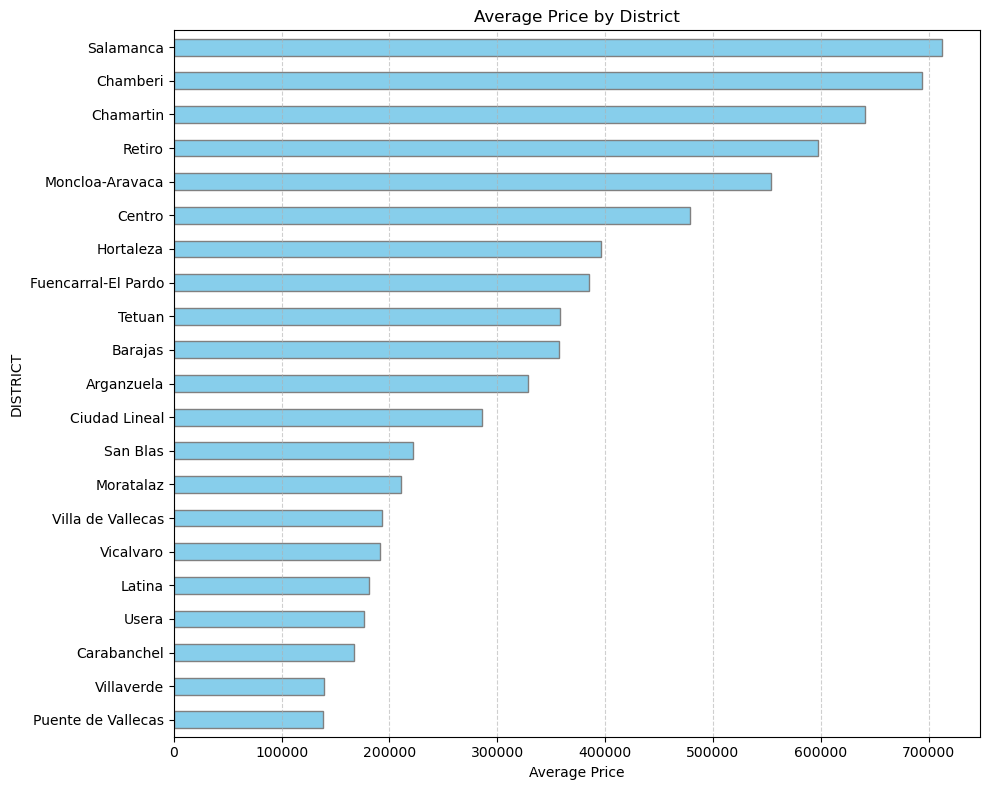

In [41]:
plt.figure(figsize=(10, 8))
stats_distritos['mean'].sort_values().plot(
    kind='barh',
    color='skyblue',
    edgecolor='gray'
)
plt.xlabel("Average Price")
plt.title("Average Price by District")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The average housing prices vary significantly across Madrid's districts. Salamanca, Chamberi, Chamartin, and Retiro stand out as the most expensive areas, with mean prices well above €500,000 and maximum values exceeding €6 million, indicating a high-end market presence. In contrast, districts such as Villaverde, Puente de Vallecas, and Carabanchel have much lower average prices, typically under €170,000, reflecting more affordable housing options. Central districts like Centro also show relatively high average prices (€479,000) but with a broader price range. This variation suggests a clear socio-economic stratification in the housing market, where location strongly influences property values.

### Outlier Treatmen

####  Handling Outliers by Percentile Filtering 

In [42]:
price_lower, price_upper = data['PRICE'].quantile([0.01, 0.99])
area_lower, area_upper = data['CONSTRUCTEDAREA'].quantile([0.01, 0.99])

filtered_data = data[
    (data['PRICE'] >= price_lower) & (data['PRICE'] <= price_upper) &
    (data['CONSTRUCTEDAREA'] >= area_lower) & (data['CONSTRUCTEDAREA'] <= area_upper)
].copy()



#### Statistical Summary Before and After Filtering (Price Variable)

In [43]:
import scipy.stats as stats
print("Original Price stats:")
print(data['PRICE'].describe())
print("Skewness:", stats.skew(data['PRICE']))

print("\nFiltered Price stats:")
print(filtered_data['PRICE'].describe())
print("Skewness:", stats.skew(filtered_data['PRICE']))

Original Price stats:
count    7.572500e+04
mean     3.892936e+05
std      4.131253e+05
min      2.100000e+04
25%      1.570000e+05
50%      2.570000e+05
75%      4.560000e+05
max      8.133000e+06
Name: PRICE, dtype: float64
Skewness: 4.07362060508038

Filtered Price stats:
count    7.319600e+04
mean     3.643492e+05
std      3.108078e+05
min      7.000000e+04
25%      1.600000e+05
50%      2.580000e+05
75%      4.490000e+05
max      2.190000e+06
Name: PRICE, dtype: float64
Skewness: 2.268968082269616


#### Visualizations for Price before and After Filtering

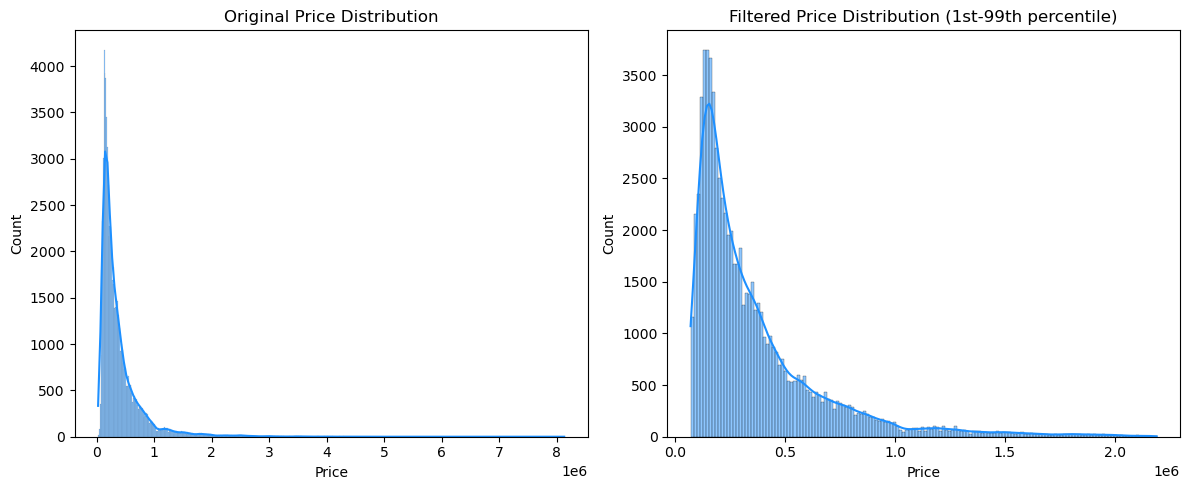

In [44]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data['PRICE'], kde=True, color='dodgerblue')
plt.title('Original Price Distribution')
plt.xlabel('Price')

plt.subplot(1,2,2)
sns.histplot(filtered_data['PRICE'], kde=True, color='dodgerblue')
plt.title('Filtered Price Distribution (1st-99th percentile)')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

##### Price Distribution

The original price data has a mean of approximately **389,294€** with a very high standard deviation (~413,125€), and a strong positive skewness of **4.07**, indicating a heavy right tail caused by extremely high-priced properties. After filtering between the 1st and 99th percentiles, the mean price decreases slightly to about **364,349€**, and the standard deviation drops to **310,808€**. The skewness reduces significantly to **2.27**, showing that the distribution becomes more balanced and less affected by extreme high prices. The maximum price after filtering is around **2.19 million euros**, much lower than the original max of over 8 million euros, which confirms the removal of extreme outliers.


#### Statistical Summary Before and After Filtering (CONSTRUCTEDAREA Variable)

In [45]:
print("\nOriginal Constructed Area stats:")
print(data['CONSTRUCTEDAREA'].describe())
print("Skewness:", stats.skew(data['CONSTRUCTEDAREA']))

print("\nFiltered Constructed Area stats:")
print(filtered_data['CONSTRUCTEDAREA'].describe())
print("Skewness:", stats.skew(filtered_data['CONSTRUCTEDAREA']))


Original Constructed Area stats:
count    75725.000000
mean       100.210155
std         66.466944
min         21.000000
25%         62.000000
50%         82.000000
75%        115.000000
max        985.000000
Name: CONSTRUCTEDAREA, dtype: float64
Skewness: 3.2738585531737083

Filtered Constructed Area stats:
count    73196.000000
mean        96.643409
std         51.823577
min         30.000000
25%         63.000000
50%         82.000000
75%        115.000000
max        366.000000
Name: CONSTRUCTEDAREA, dtype: float64
Skewness: 1.8102093251157754


#### Visualizations for CONSTRUCTEDAREA before and After Filtering

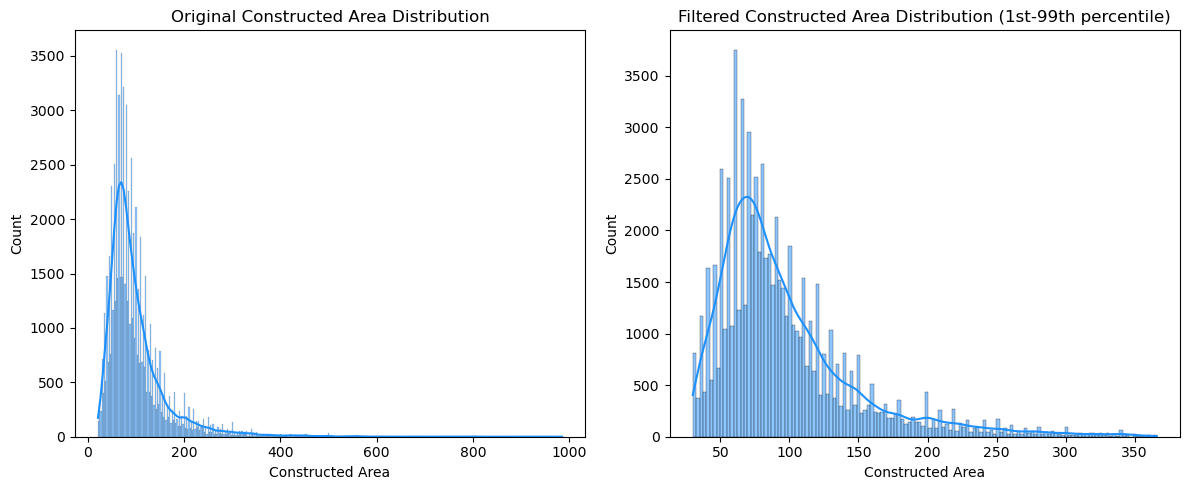

In [46]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data['CONSTRUCTEDAREA'], kde=True, color='dodgerblue')
plt.title('Original Constructed Area Distribution')
plt.xlabel('Constructed Area')

plt.subplot(1,2,2)
sns.histplot(filtered_data['CONSTRUCTEDAREA'], kde=True, color='dodgerblue')
plt.title('Filtered Constructed Area Distribution (1st-99th percentile)')
plt.xlabel('Constructed Area')

plt.tight_layout()
plt.show()


##### Constructed Area Distribution

Originally, the constructed area averages around **100.21 m²** with a standard deviation of **66.47 m²**, and a skewness of **3.27**, showing a right-skewed distribution with some very large properties. After filtering between the 1st and 99th percentiles, the mean constructed area slightly decreases to **96.64 m²**, and the standard deviation reduces to **51.82 m²**. Skewness is lowered to **1.81**, indicating a less skewed distribution and fewer extreme large-area properties. The maximum constructed area is now around **366 m²**, down from nearly 985 m², confirming the exclusion of outliers.



In [47]:
data.shape

(75725, 38)

In [48]:
filtered_data.shape

(73196, 38)

In [49]:
filtered_data.to_csv("../data/data_clean.csv", index=False)